In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
# This function calculates the time to peak mag
def find_mintime(y_vals, x_vals): 
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index]

# This function finds the magnitude that is 1/4 of the peak magnitude
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

# This function finds the magnitude that is 3/4 of the peak magnitude
def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

# This function includes the last non-detection before the first detection
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    y_error = np.array(y_error)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)

    order = np.argsort(x_vals)
    zero = np.zeros(1)
    y_error = np.append(y_error, zero)
    
    
    return x_vals[order], y_vals[order], y_error[order]

In [6]:
CV_1 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abppewc_20220603\\detections_ZTF19abppewc.csv")
plotname = CV_1

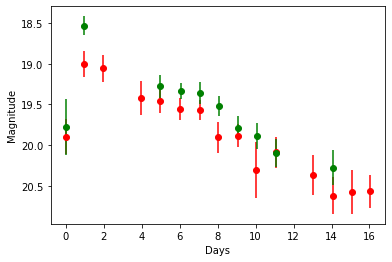

In [7]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

peak mag: 18.997744
25% of peak: 20.502893978319907
75% of peak: 19.716949181129454
0.19163852042390206
6.094746417330877
0.4322959539819636
5.7956946673947405


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


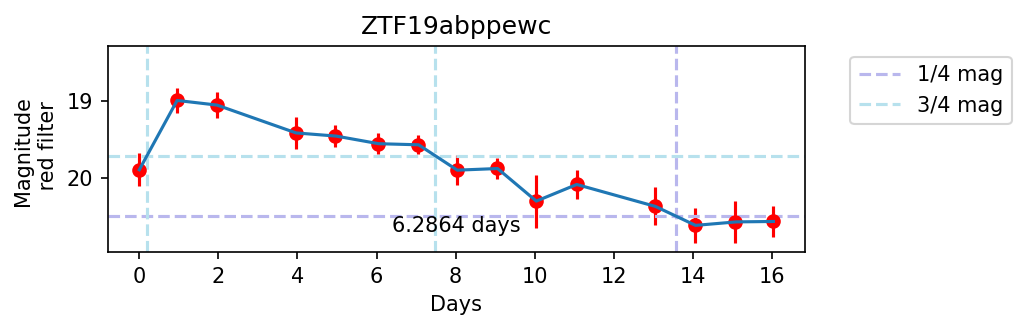

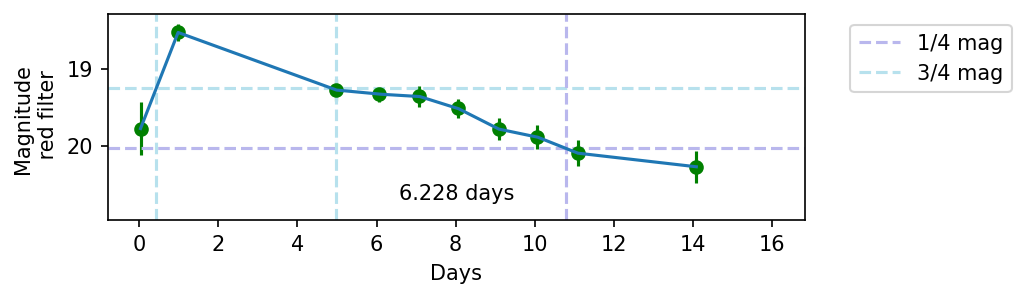

In [150]:
# red filter for CV 1

plotname = CV_1

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
print(f'peak mag: {minmag}')
print(f'25% of peak: {onequarter}')
print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre
print(time_pre)

if(np.isnan(time_post)):
    time_post = 0
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abppewc')


# green filter for CV 1


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre
print(time_pre)

if(np.isnan(time_post)):
    time_post = 0
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [151]:
CV_2 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acswirx_20220606\\detections_ZTF18acswirx.csv")
plotname = CV_2

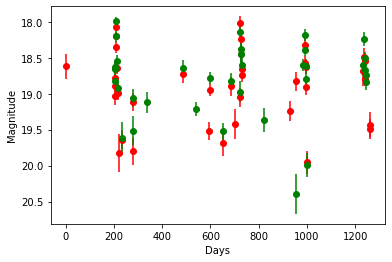

In [152]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


12.410876098738072
2.981713906425057
12.694942946082165
2.6643990985083974


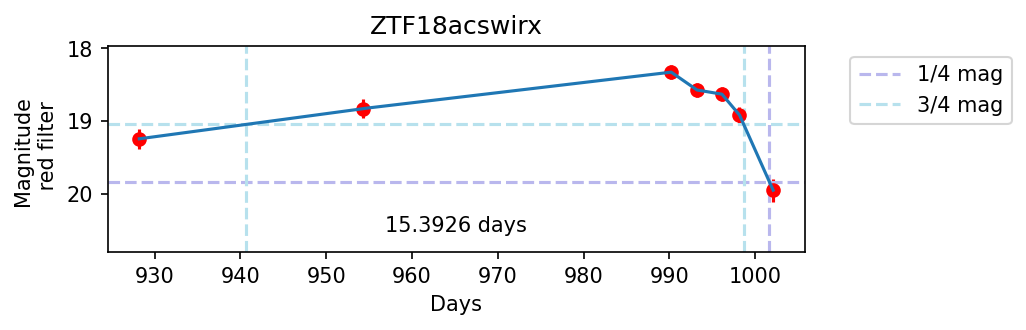

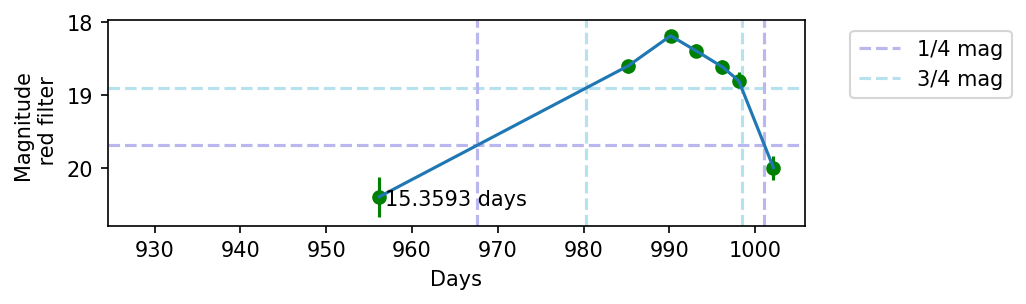

In [153]:
# red filter for CV 2

plotname = CV_2

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 25
finish = 32
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acswirx')


# green filter for CV 2


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 22
finish = 29
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [154]:
CV_3 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19aaqstxo_20220606\\detections_ZTF19aaqstxo.csv")
plotname = CV_3

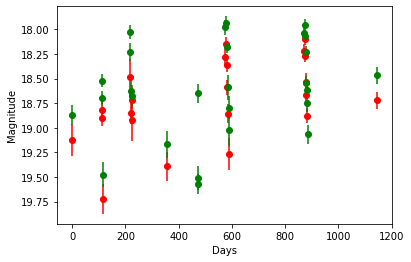

In [155]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


104.72879104119517
5.771991171980289
7.108556869561426
1.3843141330276012
8.4929


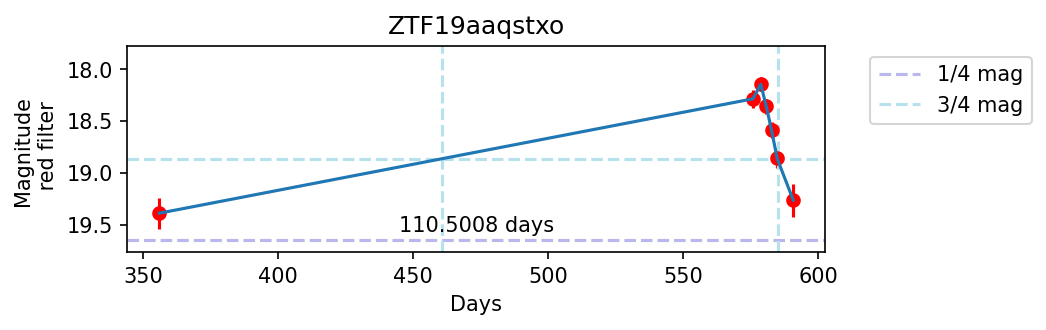

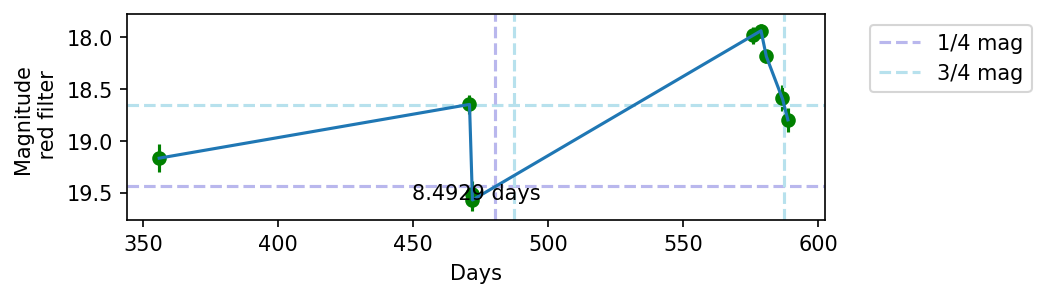

In [156]:
# red filter for CV 3

plotname = CV_3

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 8
finish = 15
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19aaqstxo')


# green filter for CV 3


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 8
finish = 17
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)
print(time)

# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [157]:
CV_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abzcokk_20220606\\detections_ZTF20abzcokk.csv")
plotname = CV_4

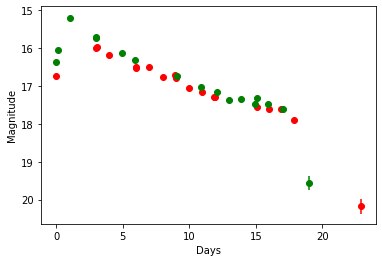

In [158]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.16928559045816544
5.8622459720587
0.2423050714809835
4.8736576926508395


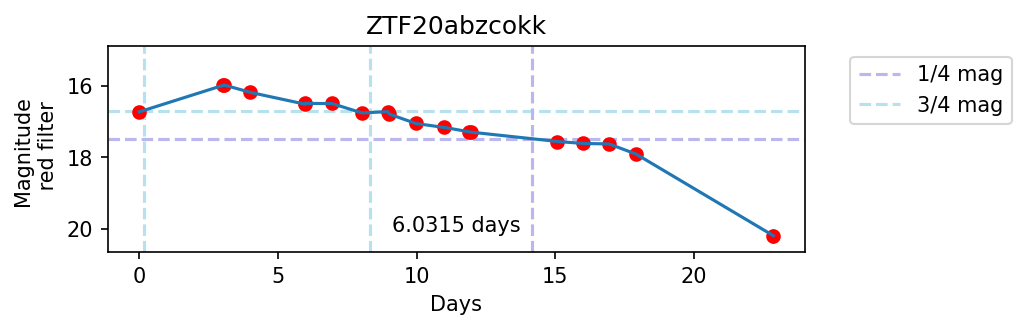

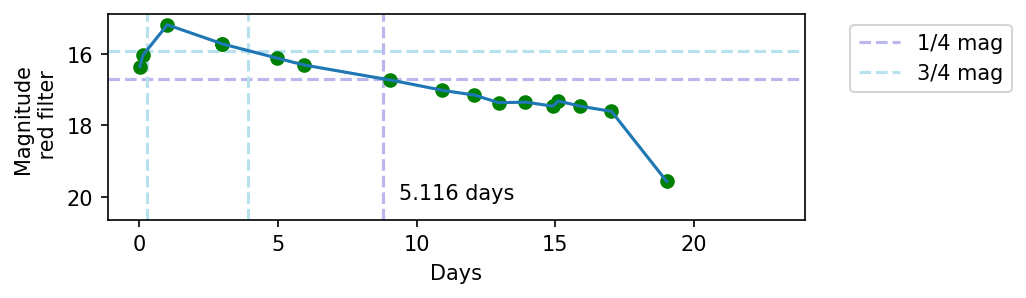

In [159]:
# red filter for CV 4

plotname = CV_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abzcokk')


# green filter for CV 4


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [160]:
CV_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acaohjl_20220606\\detections_ZTF21acaohjl.csv")
plotname = CV_5

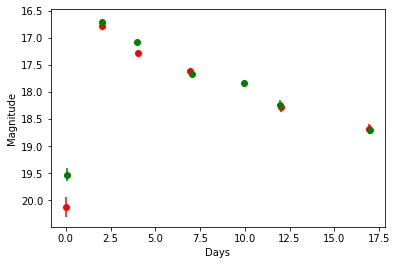

In [161]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.471098805564248
6.220876673476094
0.5508036911278047
6.074093627698623


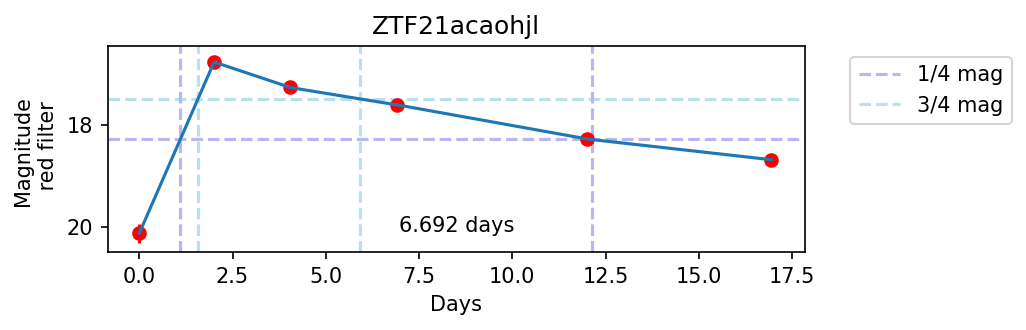

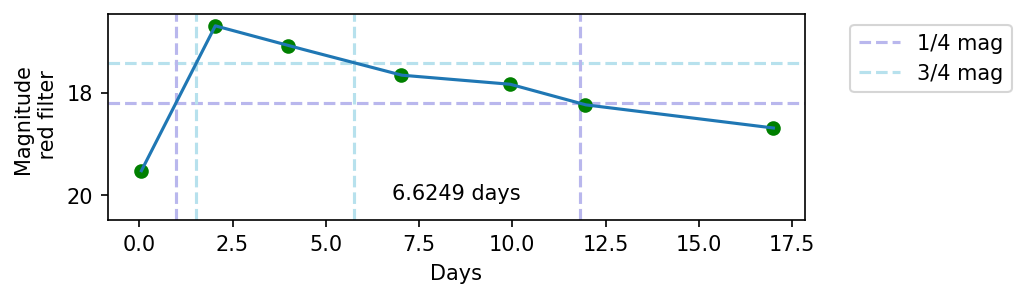

In [162]:
# red filter for CV 5

plotname = CV_5

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acaohjl')


# green filter for CV 5


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [163]:
CV_6 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21abbxnbm_20220606\\detections_ZTF21abbxnbm.csv")
plotname = CV_6

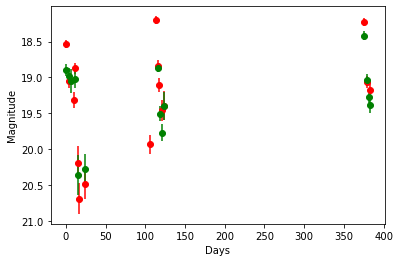

In [164]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


102.32890231197271
4.507881159117744
71.60456195564294
3.1679915415399478


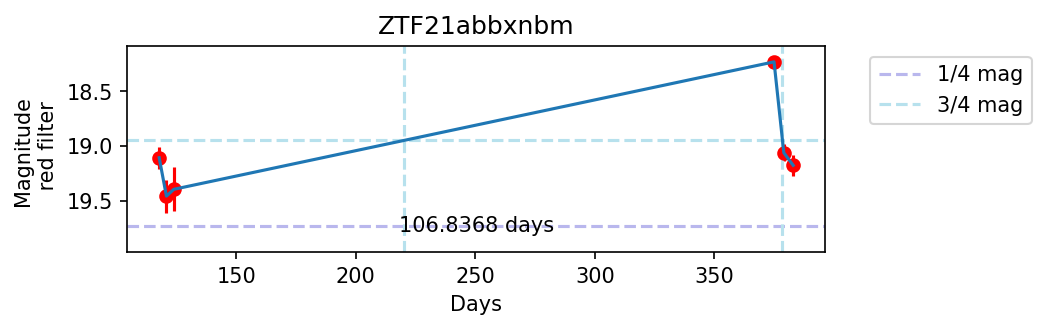

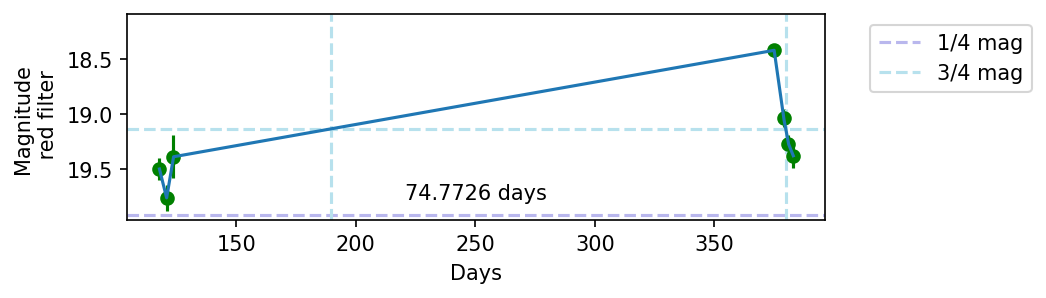

In [165]:
# red filter for CV 6

plotname = CV_6

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 10
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21abbxnbm')


# green filter for CV 6


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 7
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [166]:
CV_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aawbodq_20220606\\detections_ZTF20aawbodq.csv")
plotname = CV_7

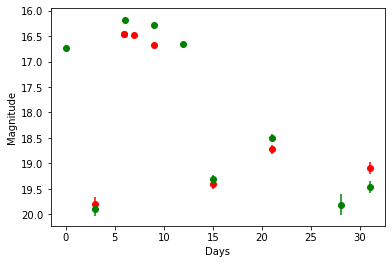

In [167]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.6988151804900298
1.725989301210312
0.6403318657905839
0.9003793047361057


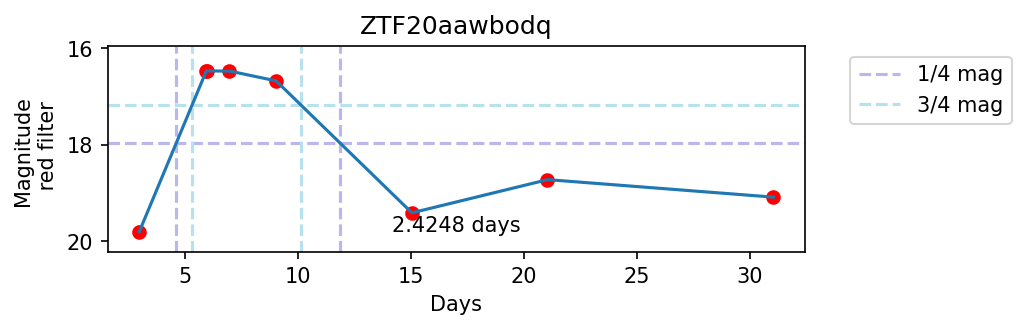

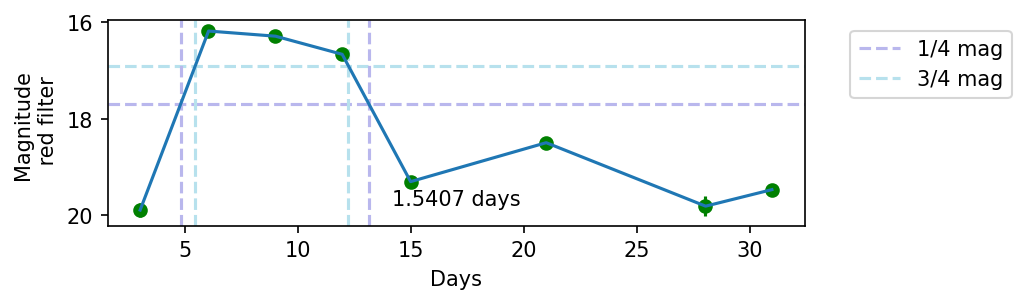

In [168]:
# red filter for CV 7

plotname = CV_7

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
print(time_pre)
time_post = onequarter_indexpost - threequarters_indexpost 
print(time_post)
time = time_pre + time_post
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aawbodq')



# green filter for CV 1



red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 1
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre
print(time_pre)

if(np.isnan(time_post)):
    time_post = 0
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [169]:
CV_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19achbhfc_20220606\\detections_ZTF19achbhfc.csv")
plotname = CV_8

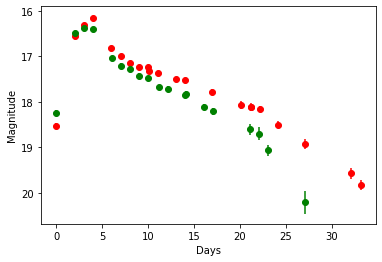

In [170]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.7963631666355522
9.259998318072025
0.8872554568994053
8.06739572569948


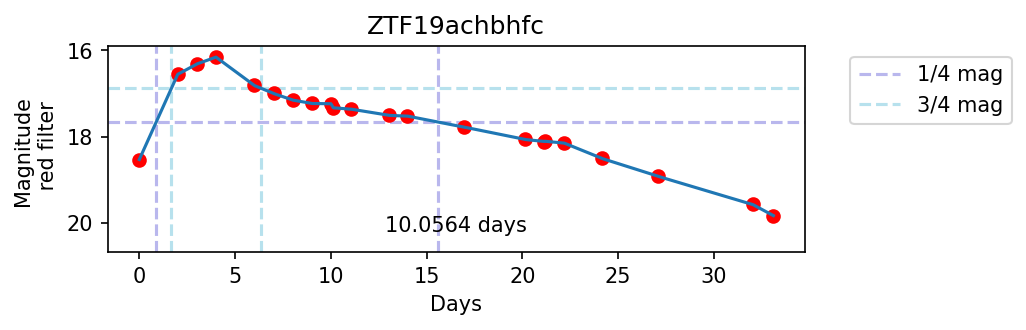

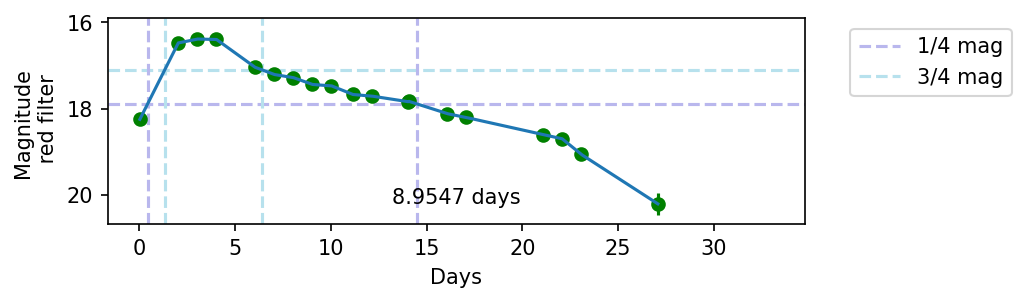

In [171]:
# red filter for CV 8

plotname = CV_8

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19achbhfc')


# green filter for CV 8


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [172]:
CV_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abzipjc_20220606\\detections_ZTF19abzipjc.csv")
plotname = CV_9

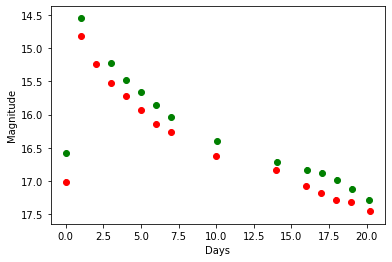

In [173]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.3583104642350623
4.355395275716025
0.3852227405793142
4.008535062310926


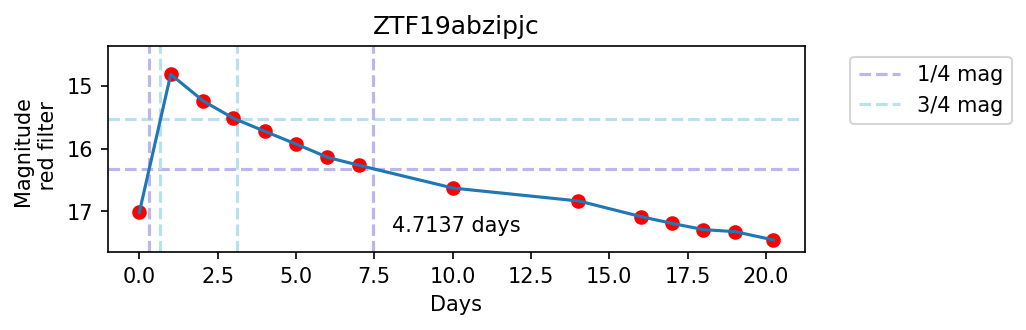

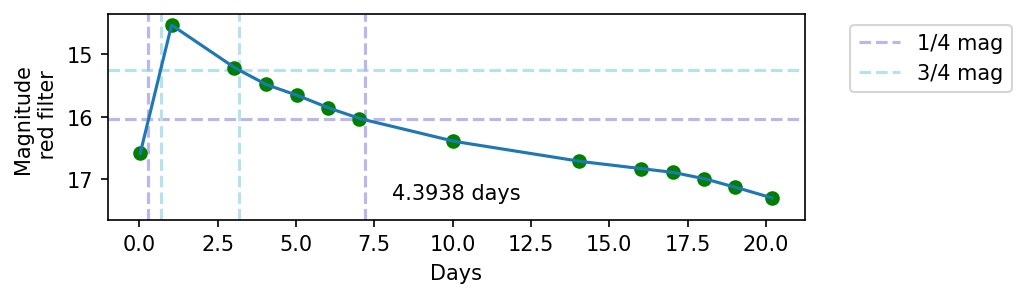

In [174]:
# red filter for CV 9

plotname = CV_9

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abzipjc')


# green filter for CV 9


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 50
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - onequarter_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [175]:
CV_10 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abyrano_20220606\\detections_ZTF19abyrano.csv")
plotname = CV_10

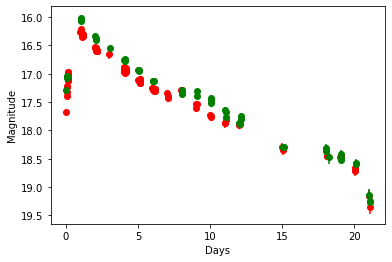

In [176]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.20737804470223062
5.705002506608084
0.3379108122718444
6.506507356190349


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


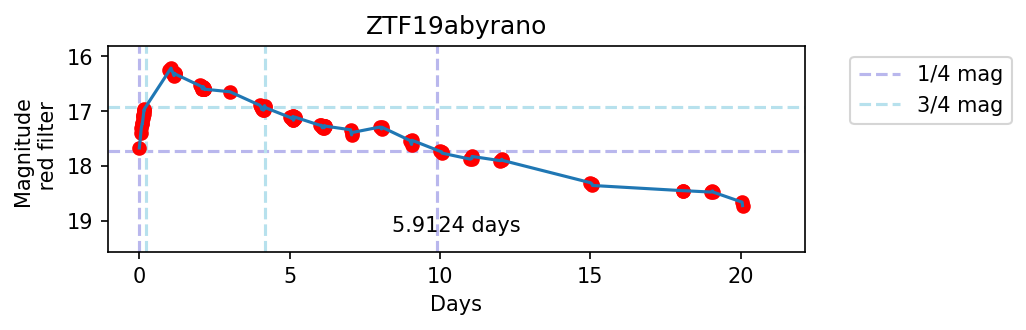

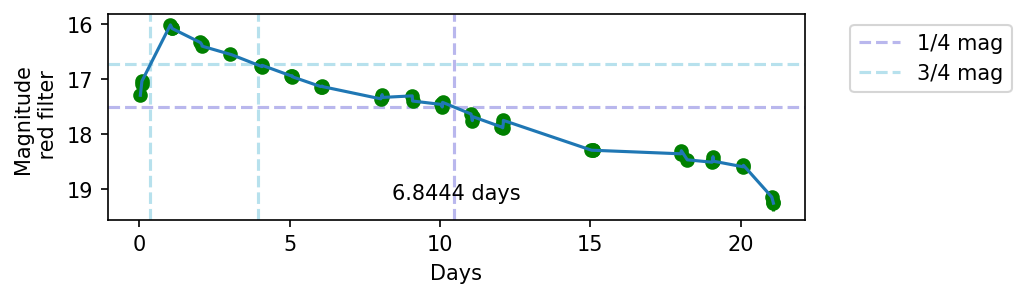

In [177]:
# red filter for CV 10

plotname = CV_10

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abyrano')


# green filter for CV 10


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [178]:
CV_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aahnvmo_20220616\\detections_ZTF22aahnvmo.csv")
plotname = CV_11

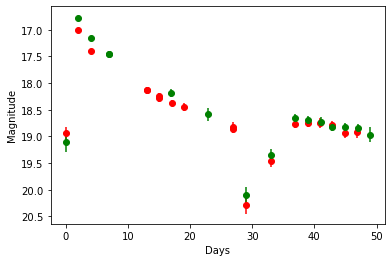

In [179]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.811012793671593
12.226135062979846
0.6734105693053443
10.923943816985963


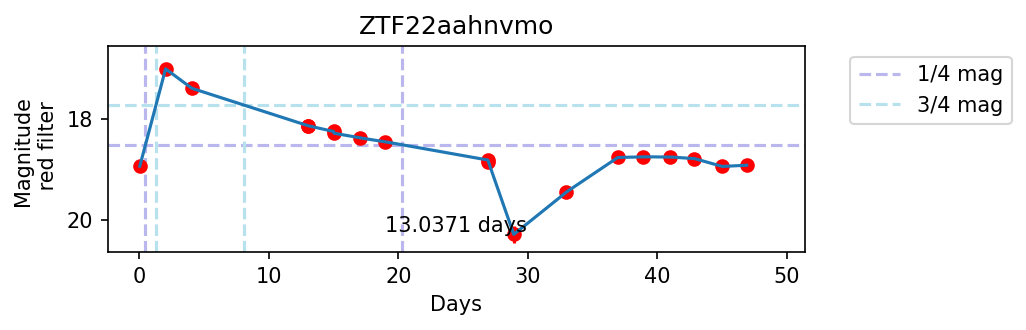

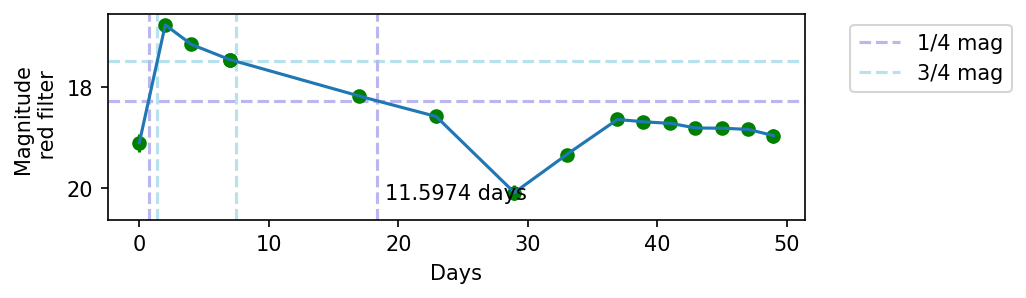

In [180]:
# red filter for CV 11

plotname = CV_11

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aahnvmo')


# green filter for CV 11


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [181]:
CV_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aakzsrj_20220616\\detections_ZTF22aakzsrj.csv")
plotname = CV_12

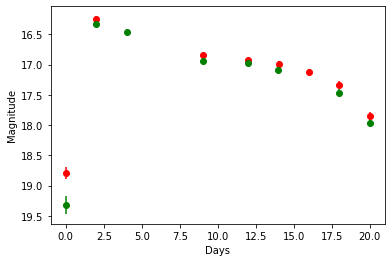

In [182]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.6080164662887839
6.477175414724433
0.5265887882043556
6.233132563223474


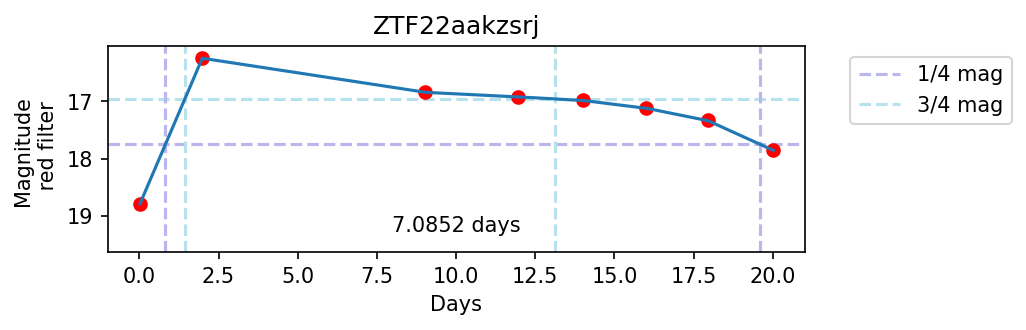

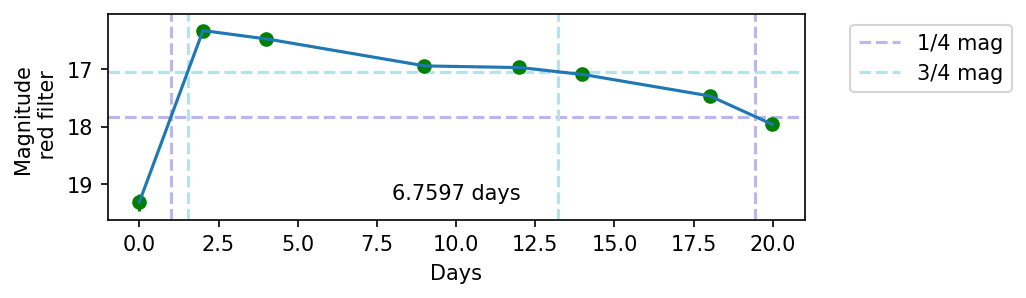

In [183]:
# red filter for CV 12

plotname = CV_12

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aakzsrj')


# green filter for CV 12


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [184]:
CV_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21accyuff_20220616\\detections_ZTF21accyuff.csv")
plotname = CV_13

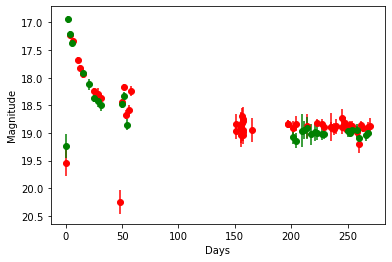

In [185]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

1.338283750247422
18.767095381376635
0.667827305970679
28.488127537921073


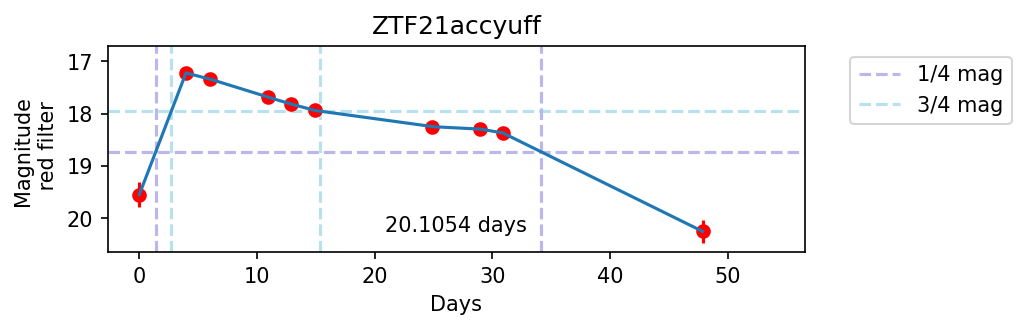

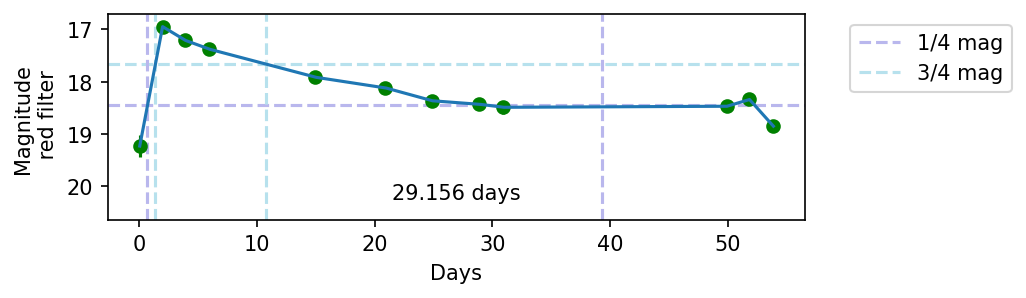

In [189]:
# red filter for CV 13

plotname = CV_13

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 10
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21accyuff')


# green filter for CV 13


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 12
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [190]:
CV_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazmjby_20220616\\detections_ZTF21aazmjby.csv")
plotname = CV_14

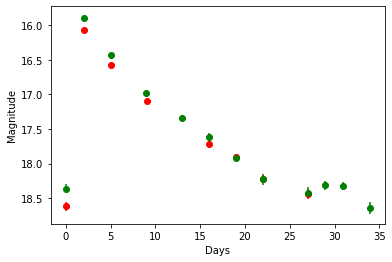

In [191]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

0.6259387123511077
7.739246536117041
0.6451052746292437
7.338921321637425


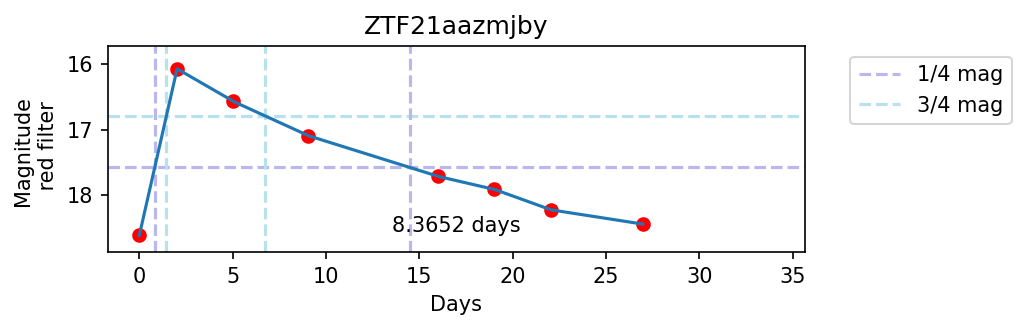

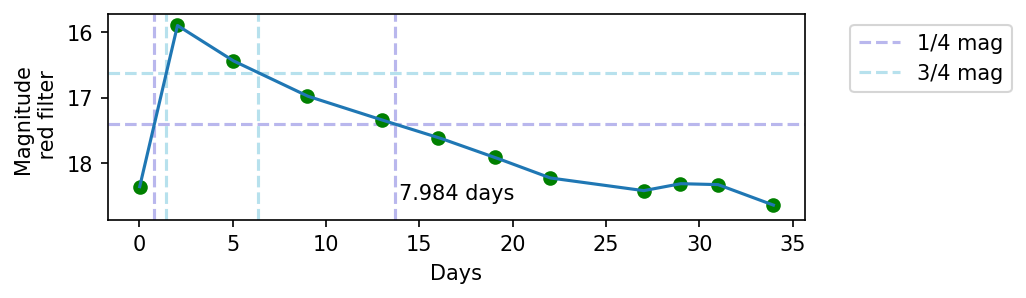

In [192]:
# red filter for CV 14

plotname = CV_14

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aazmjby')


# green filter for CV 14


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [193]:
CV_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18absnibc_20220616\\detections_ZTF18absnibc.csv")
plotname = CV_15

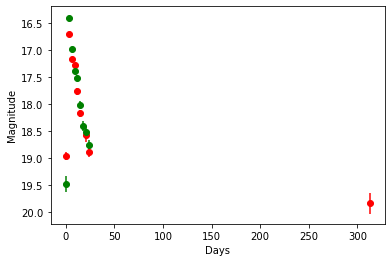

In [194]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

1.0494237694968853
5.644392155891456
0.780307976160441
7.364529949581621


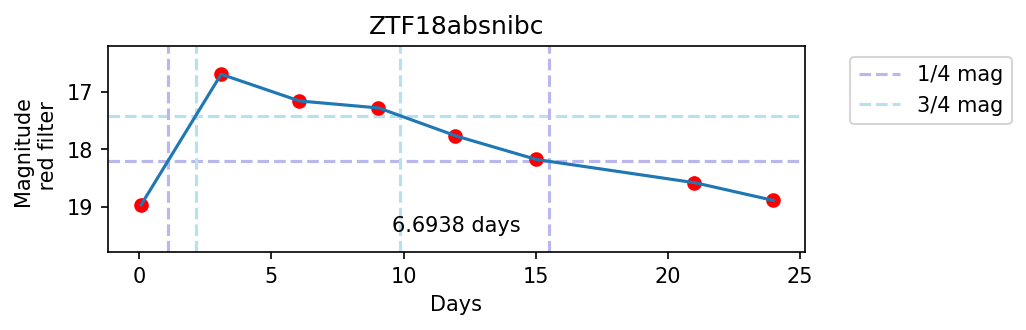

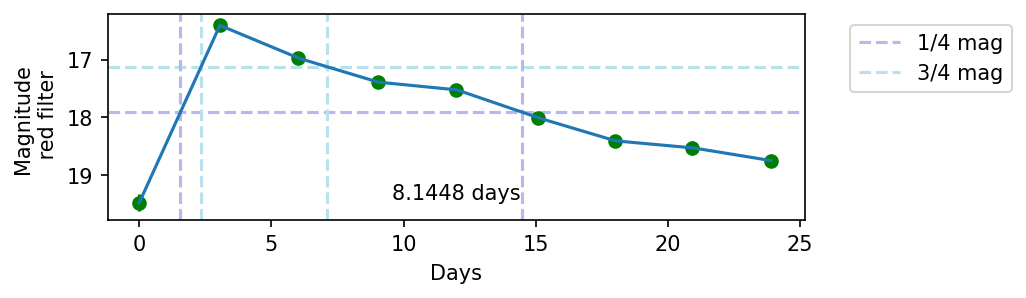

In [195]:
# red filter for CV 15

plotname = CV_15

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 8
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18absnibc')


# green filter for CV 15


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [196]:
CV_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF20aavtaib.csv")
ND_16 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF20aavtaib.csv")
plotname = CV_16
non_detection = ND_16

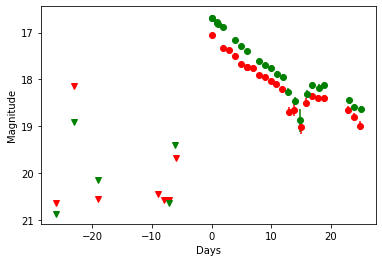

In [197]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.794896988945622
3.478309692863567
1.7674478698044584
2.8899957496035418


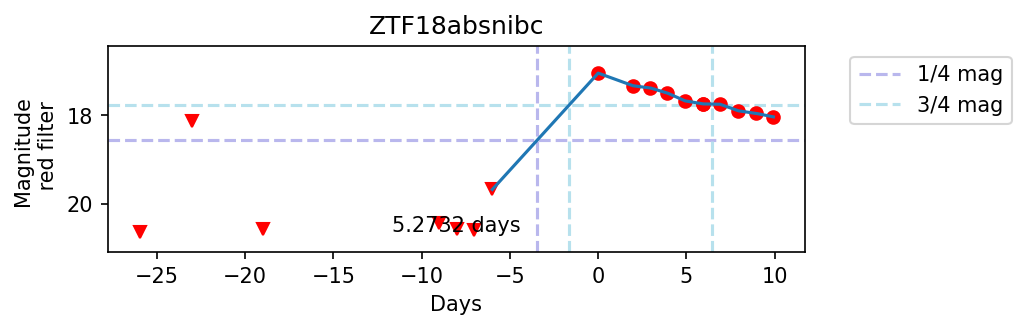

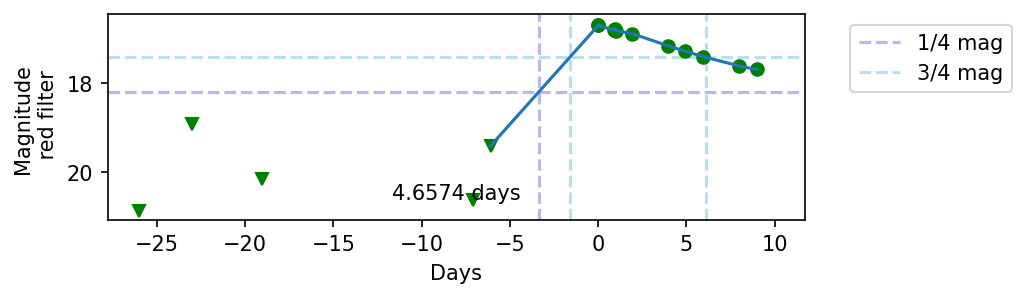

In [201]:
# red filter for CV 16

plotname = CV_16

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18absnibc')


# green filter for CV 16


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [202]:
CV_17 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18acaktuk_20220616\\detections_ZTF18acaktuk.csv")
plotname = CV_17

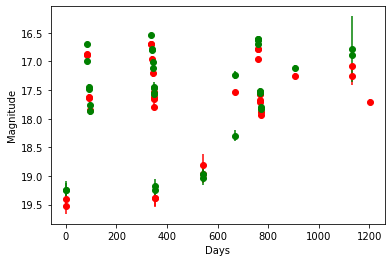

In [203]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


24.585599559073373
4.137473537703258
25.704632012159074
4.347417236867628


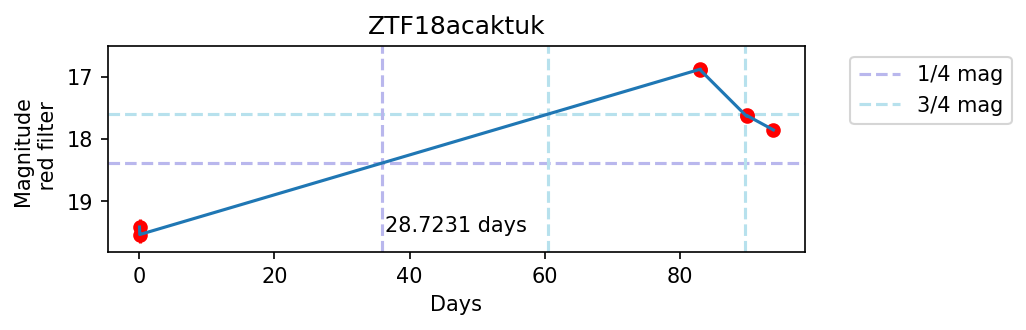

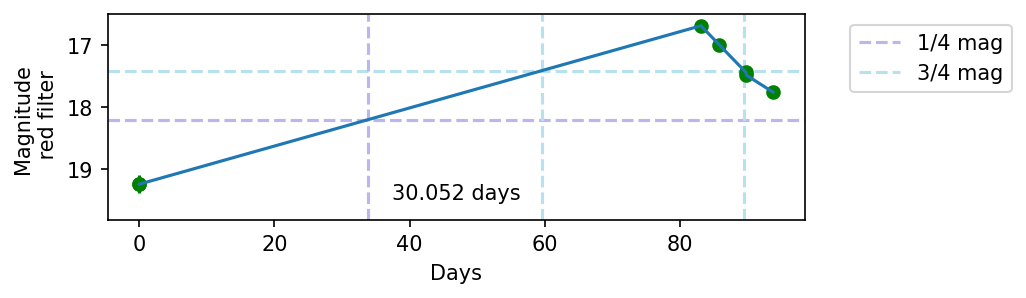

In [205]:
# red filter for CV 17

plotname = CV_17

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

#defining first peak
start = 0
finish = 7
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18acaktuk')


# green filter for CV 17


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]

y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

#defining first peak
start = 0
finish = 7
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [206]:
CV_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\detections_ZTF20aavtaib.csv")
ND_18 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aavtaib_20220616\\non_detections_ZTF20aavtaib.csv")
plotname = CV_18
non_detection = ND_18

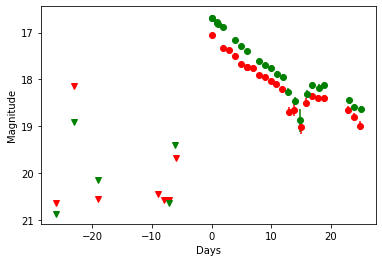

In [208]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1.794896988945622
3.478309692863567
1.7674478698044584
2.8899957496035418


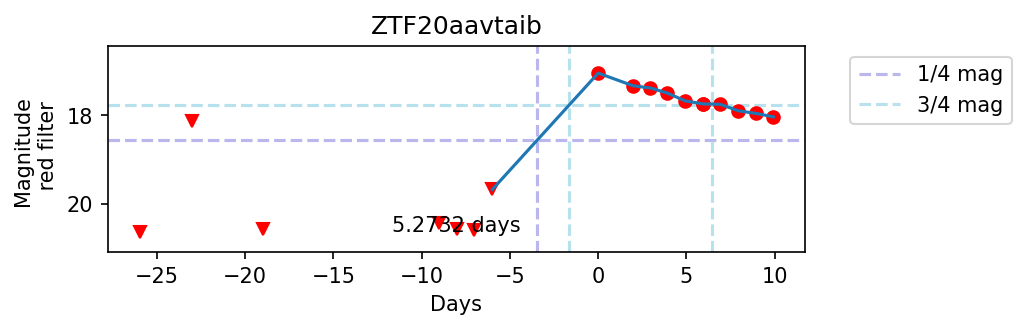

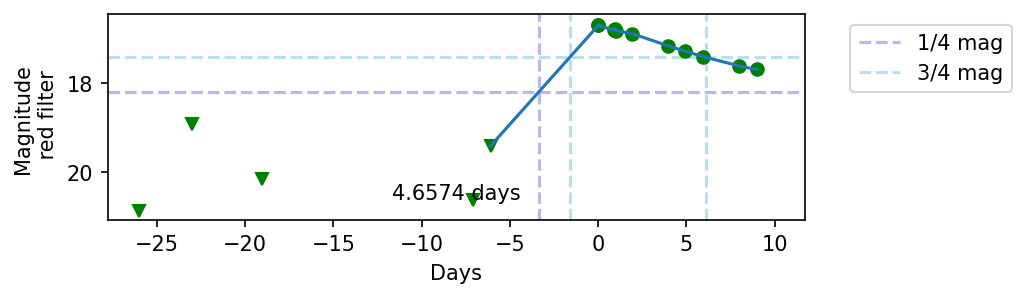

In [210]:
# red filter for CV 18

plotname = CV_18

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aavtaib')


# green filter for CV 18


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 11
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [211]:
CV_19= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\detections_ZTF21acgrero.csv")
ND_19 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acgrero_20220616\\non_detections_ZTF21acgrero.csv")
plotname = CV_19
non_detection = ND_19

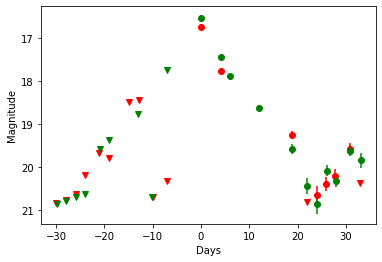

In [212]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

1.5566665671443722
6.05581262096408
2.8324111290503087
4.055724898266108


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


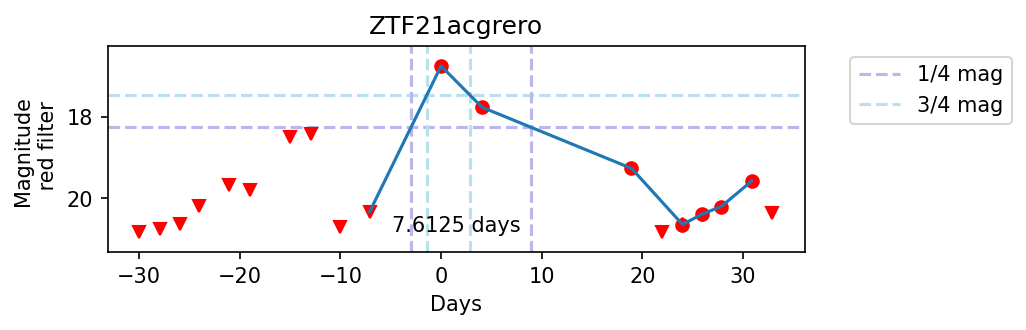

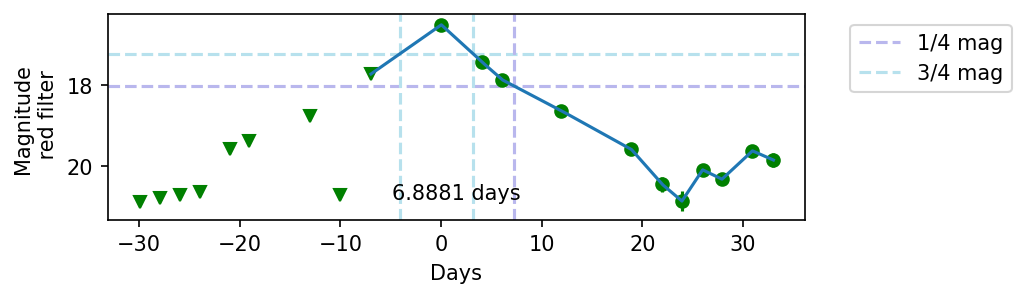

In [214]:
# red filter for CV 19

plotname = CV_19

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acgrero')


# green filter for CV 19


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [215]:
CV_20= pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\detections_ZTF18abrxrms.csv")
ND_20 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abrxrms_20220616\\non_detections_ZTF18abrxrms.csv")
plotname = CV_20
non_detection = ND_20

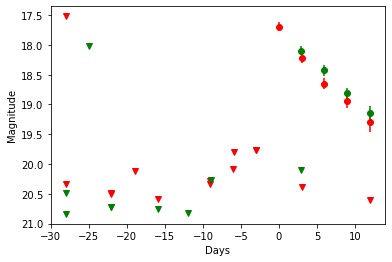

In [216]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

1.1309052936594788
6.838222212877203
0.008174244554178589
2.8882330758097545


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


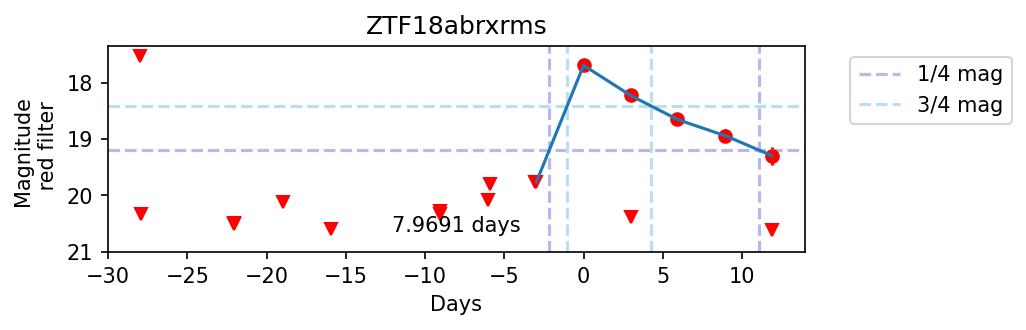

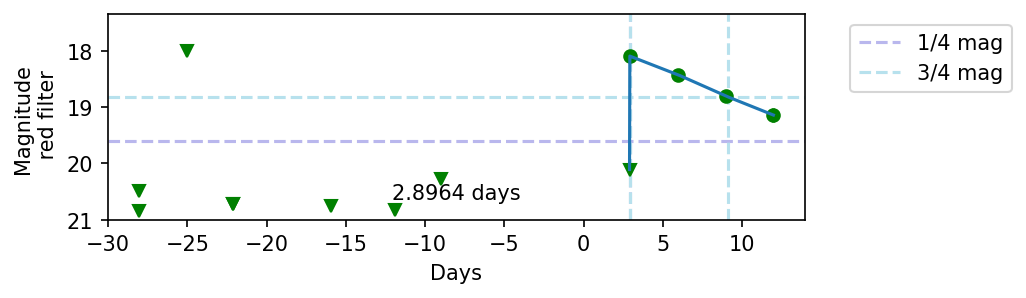

In [218]:
# red filter for CV 20

plotname = CV_20

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abrxrms')


# green filter for CV 20


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]

nd_x_vals = non_detection['mjd'][nd_green_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [219]:
abv_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla detections - Sheet1.csv")
abv_nd = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abvkwla non detections - Sheet1.csv")
plotname = abv_detections
non_detection = abv_nd

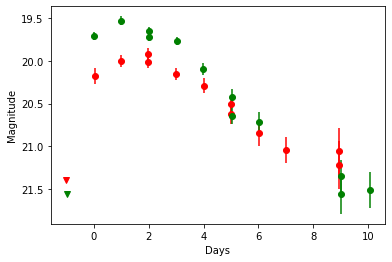

In [220]:
red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')

nd_red_points = non_detection['Filter']=='r'
nd_green_points = non_detection['Filter']=='g'
plt.errorbar(non_detection['Date'][nd_red_points]-plotname['Date'][0], non_detection['Mag'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['Date'][nd_green_points]-plotname['Date'][0], non_detection['Mag'][nd_green_points], c='green', fmt='v')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.6507950795077604
3.7863536353624285
0.47747224722488524
3.253022302231333


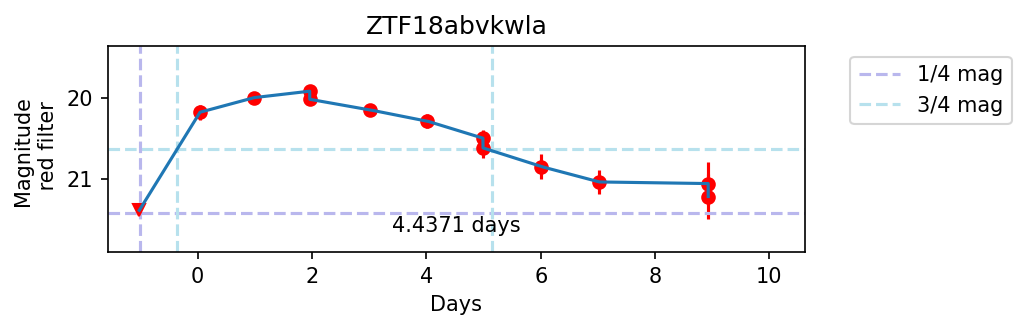

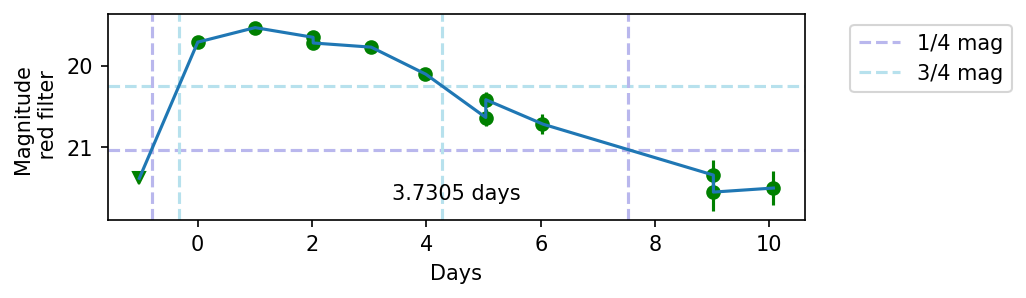

In [223]:
# red filter for transient 1

plotname = abv_detections
non_detection = abv_nd

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][red_points]-plotname['Date'][0]
y_vals = plotname['Mag'][red_points]
y_error = plotname['Mag_err'][red_points]

nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
nd_y_vals = non_detection['Mag'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abvkwla')


# green filter for transient 1


plotname = abv_detections
non_detection = abv_nd

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][green_points]-plotname['Date'][0]
y_vals = plotname['Mag'][green_points]
y_error = plotname['Mag_err'][green_points]

nd_x_vals = non_detection['Date'][nd_red_points]-plotname['Date'][0]
nd_y_vals = non_detection['Mag'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [224]:
abc_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18abcfcoo detections - Sheet1.csv")
abc_nd = pd.read_csv('C:\\Users\\marya\\Downloads\\ZTF18abcfcoo non detections - Sheet1.csv')
plotname = abc_detections
non_detection = abc_nd

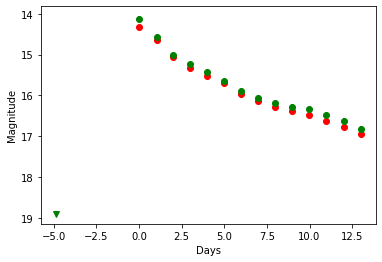

In [225]:
red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')

nd_red_points = non_detection['Filter']=='r'
nd_green_points = non_detection['Filter']=='g'
plt.errorbar(non_detection['Date'][nd_red_points]-plotname['Date'][0], non_detection['Mag'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['Date'][nd_green_points]-plotname['Date'][0], non_detection['Mag'][nd_green_points], c='green', fmt='v')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0
3.494009900989552
1.580591480698276
3.266970580183443


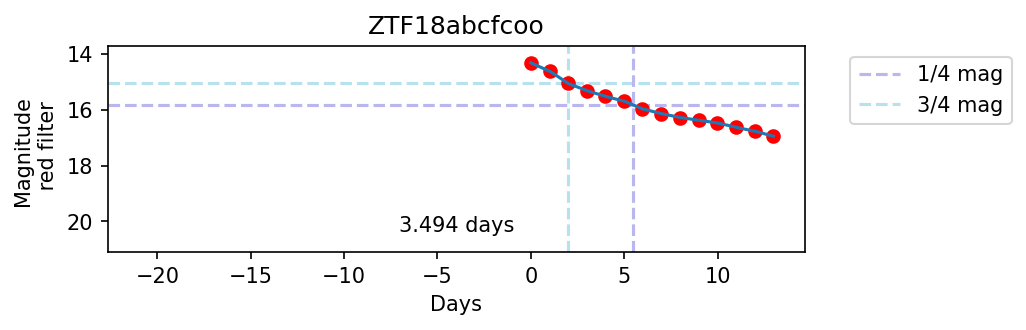

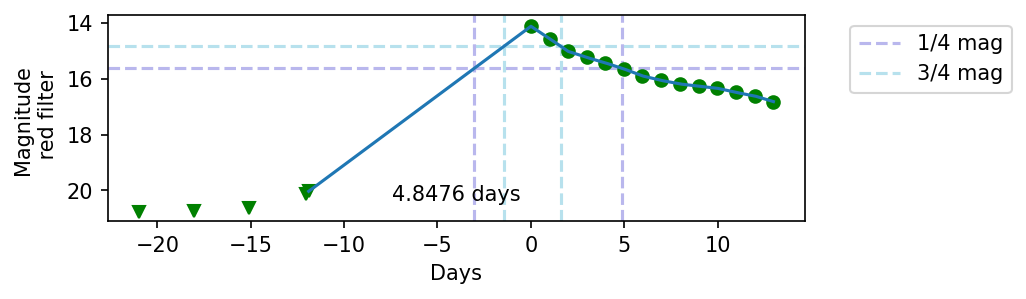

In [237]:
# red filter for transient 1

plotname = abc_detections

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][red_points]-plotname['Date'][0]
y_vals = plotname['Mag'][red_points]
y_error = plotname['Mag_err'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre =0
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18abcfcoo')



# green filter for transient 2


plotname = abc_detections
non_detection = abc_nd

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][green_points]-plotname['Date'][0]
y_vals = plotname['Mag'][green_points]
y_error = plotname['Mag_err'][green_points]


#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')
ax2.errorbar(nd_x_vals, nd_y_vals, c='green', fmt='v')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [230]:
aci_detections = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20acigmel detections - Sheet1.csv")
plotname = aci_detections

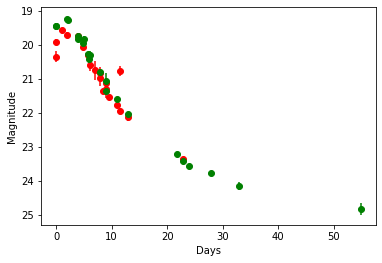

In [231]:
red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
plt.errorbar(plotname['Date'][red_points]-plotname['Date'][0], plotname['Mag'][red_points], plotname['Mag_err'][red_points], c='red', fmt='o')
plt.errorbar(plotname['Date'][green_points]-plotname['Date'][0], plotname['Mag'][green_points], plotname['Mag_err'][green_points], c='green', fmt='o')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

peak mag: 19.56
25% of peak: 21.065149978319905
nan
0.002286946694669577
17.591193975398387
0
2.540270180017898


C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


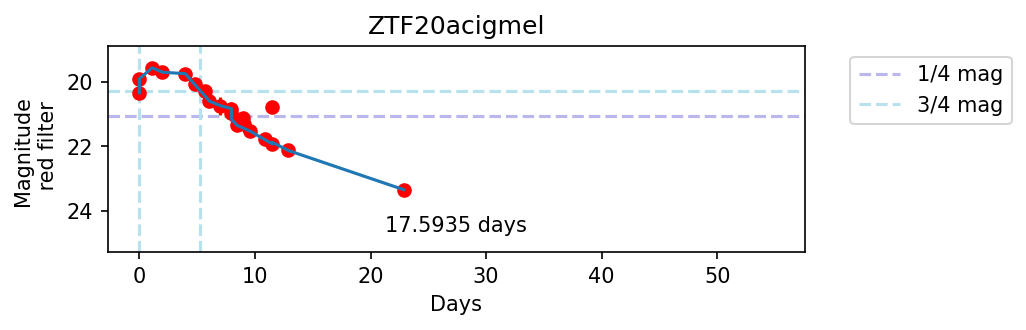

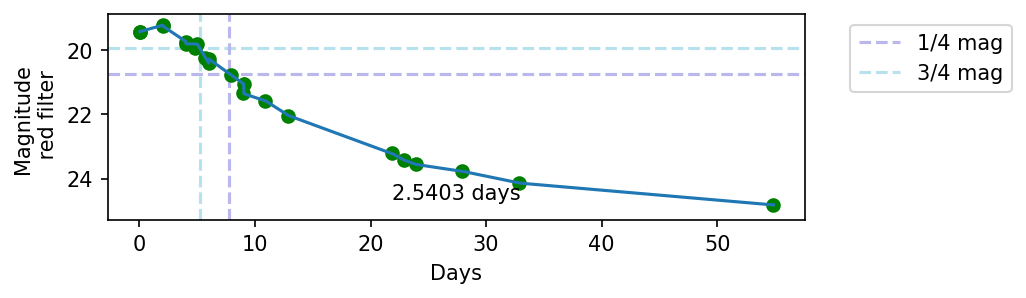

In [243]:
# red filter for transient 3

plotname = aci_detections

red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][red_points]-plotname['Date'][0]
y_vals = plotname['Mag'][red_points]
y_error = plotname['Mag_err'][red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
print(f'peak mag: {minmag}')
print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20acigmel')


# green filter for transient 3


red_points = plotname['Filter']=='r'
green_points = plotname['Filter']=='g'
x_vals = plotname['Date'][green_points]-plotname['Date'][0]
y_vals = plotname['Mag'][green_points]
y_error = plotname['Mag_err'][green_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = 0
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [234]:
ET_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\detections_ZTF20abfhyil.csv")
ND_4 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20abfhyil_20220606\\non_detections_ZTF20abfhyil.csv")

non_detection = ND_4
non_detection

plotname = ET_4

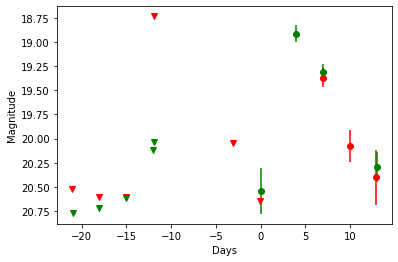

In [235]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')

nd_red_points = non_detection['fid']==2
nd_green_points = non_detection['fid']==1
plt.errorbar(non_detection['mjd'][nd_red_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_red_points], c='red', fmt='v')
plt.errorbar(non_detection['mjd'][nd_green_points]-plotname['mjd'][0], non_detection['diffmaglim'][nd_green_points], c='green', fmt='v')

plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\marya\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3.035907249305501
2.7608570295325663
4.739430385043175
4.020641798088846


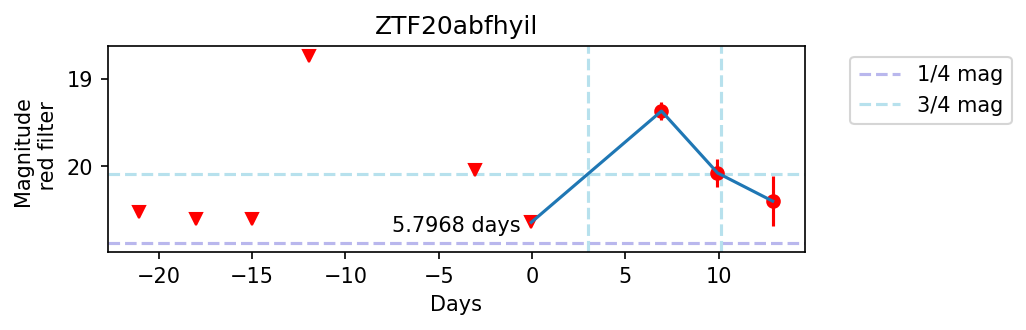

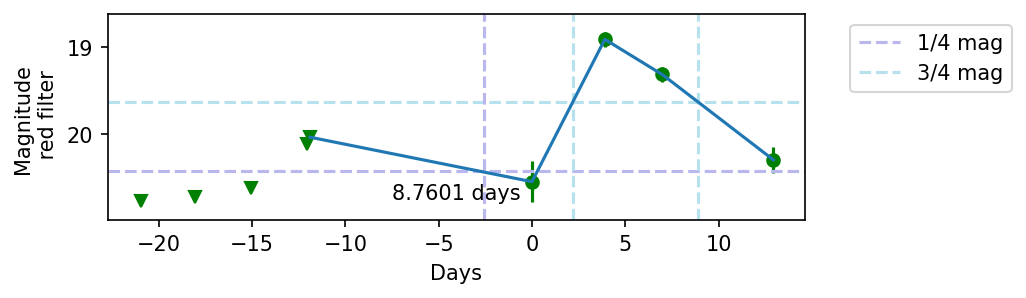

In [236]:
# red filter for transient 4

plotname = ET_4
non_detection = ND_4

red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][red_points]
y_error = plotname['sigmapsf'][red_points]

nd_x_vals = non_detection['mjd'][nd_red_points]-plotname['mjd'][0]
nd_y_vals = non_detection['diffmaglim'][nd_red_points]

#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

x_sorted, y_sorted, y_error_sorted = include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude

time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_sorted[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_sorted[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')
ax1.errorbar(nd_x_vals, nd_y_vals, c='red', fmt='v')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20abfhyil')


# green filter for transient 4


red_points = plotname['fid']==2
green_points = plotname['fid']==1
x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
y_vals = plotname['magpsf'][green_points]
y_error = plotname['sigmapsf'][green_points]


#defining first peak
start = 0
finish = 100
x_vals = x_vals[start:finish]
y_vals = y_vals[start:finish]
y_error = y_error[start:finish]

# finding peak magnitude and its index
y_vals = np.array(y_vals)
x_vals = np.array(x_vals)
minmag = np.min(y_vals)
mintime = find_mintime(y_vals, x_vals)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)

# Find 25% and 75% of peak mag
onequarter = minmag + -2.5*np.log10(0.25)
threequarters = minmag + -2.5*np.log(0.75)
#print(f'peak mag: {minmag}')
#print(f'25% of peak: {onequarter}')
#print(f'75% of peak: {threequarters}')

# Find index of 25% and 75%

onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)
#print(onequarter_indexpre)
#print(onequarter_indexpost)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)
#print(threequarters_indexpre)
#print(threequarters_indexpost)

# Time between 25% - 75% magnitude
time_pre = threequarters_indexpre - onequarter_indexpre
time_post = onequarter_indexpost - threequarters_indexpost 

if(np.isnan(time_pre)):
    time_pre = threequarters_indexpre - x_vals[0]
print(time_pre)

if(np.isnan(time_post)):
    time_post = x_vals[-1] - threequarters_indexpost
print(time_post)

time = time_pre + time_post
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,1)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()
ax1.get_shared_x_axes().join(ax1,ax2)
ax1.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_sorted), np.max(x_sorted), 10000)
y_interp = np.interp(x_interp, x_sorted, y_sorted)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()